### Libraries
There are NO external libraries for INDEXING the texts

In [1]:
# for crawling
from selenium import webdriver
from tqdm.notebook import tqdm
import time

# for compute tf-idf
import math

# for result visualization
import matplotlib.pyplot as plt

### IMSDb Crawling: movie title

In [2]:
def crawling_title(genre, title_num):
    title_list = []
    driver.get(f'https://imsdb.com/genre/{genre}')
    time.sleep(1)
    
    for i in range(1, title_num+1, 1):
        title = driver.find_element_by_xpath(f'//*[@id="mainbody"]/table[2]/tbody/tr/td[3]/p[{i}]/a').text
        title_list.append(title)
    return title_list
    
    
# start chrome webdriver
driver = webdriver.Chrome('chromedriver.exe')     
driver.implicitly_wait(3)

    
# take all titles from each category 
drama_title_list    = crawling_title('Drama', 652)
romance_title_list  = crawling_title('Romance', 211)
comedy_title_list   = crawling_title('Comedy', 384)
thriller_title_list = crawling_title('Thriller', 406)
crime_title_list    = crawling_title('Crime', 231)

In [3]:
print(' Drama    category movie counts:', len(drama_title_list))
print(' Romance  category movie counts:', len(romance_title_list))
print(' Comedy   category movie counts:', len(comedy_title_list))
print(' Thriller category movie counts:', len(thriller_title_list))
print(' Crime    category movie counts:', len(crime_title_list))

 Drama    category movie counts: 652
 Romance  category movie counts: 211
 Comedy   category movie counts: 384
 Thriller category movie counts: 406
 Crime    category movie counts: 231


### IMSDb Crawling: movie script

In [4]:
def crawling_script(title_list):
    script_list = []
    for title in tqdm(title_list):
        title = title.replace(' ', '-')
        link = f'https://imsdb.com/scripts/{title}.html'
        driver.get(link)
        time.sleep(0.5)
        
        try:
            script = driver.find_element_by_xpath('//*[@id="mainbody"]/table[2]/tbody/tr/td[3]/table/tbody/tr/td/pre').text
            script_list.append(script)
        except:
            try:
                script = driver.find_element_by_xpath('//*[@id="mainbody"]/table[2]/tbody/tr/td[3]/table/tbody/tr/td/pre/pre').text
                script_list.append(script)
            except:
                pass
    return script_list


# take all scripts from each category
drama_script_list    = crawling_script(drama_title_list)
romance_script_list  = crawling_script(romance_title_list)
comedy_script_list   = crawling_script(comedy_title_list)
thriller_script_list = crawling_script(thriller_title_list)
crime_script_list    = crawling_script(crime_title_list)
driver.close()

  0%|          | 0/652 [00:00<?, ?it/s]

  0%|          | 0/211 [00:00<?, ?it/s]

  0%|          | 0/384 [00:00<?, ?it/s]

  0%|          | 0/406 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

In [5]:
print(' Drama    category script counts:', len(drama_script_list))
print(' Romance  category script counts:', len(romance_script_list))
print(' Comedy   category script counts:', len(comedy_script_list))
print(' Thriller category script counts:', len(thriller_script_list))
print(' Crime    category script counts:', len(crime_script_list))

 Drama    category script counts: 637
 Romance  category script counts: 207
 Comedy   category script counts: 372
 Thriller category script counts: 389
 Crime    category script counts: 218


### Preprocessing

In [6]:
def preprocessing_script(script_list):
    preprocessed_script_list = []
    special_characters = ['!', '?', '"','#','$','%','&','(',')','*','+',
                          '/',':',';','<','=','>','@','[','\\',']','^',
                          '`','{','|','}','~','\t', '\n', '-', ',', '.']
    for script in tqdm(script_list):
        for ch in special_characters:
            script = script.replace(ch, '')
        preprocessed_script_list.append(script.lower())
    return preprocessed_script_list


# after preprocessing
drama_script_list    = preprocessing_script(drama_script_list)
romance_script_list  = preprocessing_script(romance_script_list)
comedy_script_list   = preprocessing_script(comedy_script_list)
thriller_script_list = preprocessing_script(thriller_script_list)
crime_script_list    = preprocessing_script(crime_script_list)

  0%|          | 0/637 [00:00<?, ?it/s]

  0%|          | 0/207 [00:00<?, ?it/s]

  0%|          | 0/372 [00:00<?, ?it/s]

  0%|          | 0/389 [00:00<?, ?it/s]

  0%|          | 0/218 [00:00<?, ?it/s]

### Tokenization and Removing Stopwords

In [7]:
# define stopwords
# reference: https://www.textfixer.com/tutorials/common-english-words.txt
with open('./eng_stopwords.txt') as file:
    text = file.read()
stopwords = text.split(',')

print(stopwords, end='')

['a', 'able', 'about', 'across', 'after', 'all', 'almost', 'also', 'am', 'among', 'an', 'and', 'any', 'are', 'as', 'at', 'be', 'because', 'been', 'but', 'by', 'can', 'cannot', 'could', 'dear', 'did', 'do', 'does', 'either', 'else', 'ever', 'every', 'for', 'from', 'get', 'got', 'had', 'has', 'have', 'he', 'her', 'hers', 'him', 'his', 'how', 'however', 'i', 'if', 'in', 'into', 'is', 'it', 'its', 'just', 'least', 'let', 'like', 'likely', 'may', 'me', 'might', 'most', 'must', 'my', 'neither', 'no', 'nor', 'not', 'of', 'off', 'often', 'on', 'only', 'or', 'other', 'our', 'own', 'rather', 'said', 'say', 'says', 'she', 'should', 'since', 'so', 'some', 'than', 'that', 'the', 'their', 'them', 'then', 'there', 'these', 'they', 'this', 'tis', 'to', 'too', 'twas', 'us', 'wants', 'was', 'we', 'were', 'what', 'when', 'where', 'which', 'while', 'who', 'whom', 'why', 'will', 'with', 'would', 'yet', 'you', 'your']

In [8]:
def tokenizing_removing_stopwords_script(script_list):
    tokenized_script_list = []
    for script in tqdm(script_list):
        word_list = script.split()
        
        for word in word_list:
            if word in stopwords:
                while word in word_list: word_list.remove(word)
            if '�' in word:
                word_list.remove(word)
        tokenized_script_list.append(word_list)
    return tokenized_script_list


# after tokenization and removing stopwords
drama_token_list    = tokenizing_removing_stopwords_script(drama_script_list)
romance_token_list  = tokenizing_removing_stopwords_script(romance_script_list)
comedy_token_list   = tokenizing_removing_stopwords_script(comedy_script_list)
thriller_token_list = tokenizing_removing_stopwords_script(thriller_script_list)
crime_token_list    = tokenizing_removing_stopwords_script(crime_script_list)

  0%|          | 0/637 [00:00<?, ?it/s]

  0%|          | 0/207 [00:00<?, ?it/s]

  0%|          | 0/372 [00:00<?, ?it/s]

  0%|          | 0/389 [00:00<?, ?it/s]

  0%|          | 0/218 [00:00<?, ?it/s]

### Inverted Indexing the texts

In [9]:
def making_inverted_index(token_list):
    indexing_terms = {}
    postings_lists = {}
    for i in tqdm(range(len(token_list))):
        for word in token_list[i]:
            
            if word not in indexing_terms:
                indexing_terms[word] = 1
            if word in indexing_terms:
                indexing_terms[word] += 1
            
            if word not in postings_lists:
                postings_lists[word] = []
            if word in postings_lists:
                if i in postings_lists[word]: continue
                else: postings_lists[word].append(i)
    
    return indexing_terms, postings_lists


# after making inverted index
drama_indexing_terms, drama_postings_lists       = making_inverted_index(drama_token_list)
romance_indexing_terms, romance_postings_lists   = making_inverted_index(romance_token_list)
comedy_indexing_terms, comedy_postings_lists     = making_inverted_index(comedy_token_list)
thriller_indexing_terms, thriller_postings_lists = making_inverted_index(thriller_token_list)
crime_indexing_terms, crime_postings_lists       = making_inverted_index(crime_token_list)

  0%|          | 0/637 [00:00<?, ?it/s]

  0%|          | 0/207 [00:00<?, ?it/s]

  0%|          | 0/372 [00:00<?, ?it/s]

  0%|          | 0/389 [00:00<?, ?it/s]

  0%|          | 0/218 [00:00<?, ?it/s]

In [10]:
# sort inverted index by word frequency
drama_indexing_terms    = sorted(drama_indexing_terms.items(), key=lambda x: x[1], reverse=True)
romance_indexing_terms  = sorted(romance_indexing_terms.items(), key=lambda x: x[1], reverse=True)
comedy_indexing_terms   = sorted(comedy_indexing_terms.items(), key=lambda x: x[1], reverse=True)
thriller_indexing_terms = sorted(thriller_indexing_terms.items(), key=lambda x: x[1], reverse=True)
crime_indexing_terms    = sorted(crime_indexing_terms.items(), key=lambda x: x[1], reverse=True)

In [11]:
# dictionary slicing because existing dictionary size is too large to print
drama_indexing_terms    = drama_indexing_terms[:50]
romance_indexing_terms  = romance_indexing_terms[:50]
comedy_indexing_terms   = comedy_indexing_terms[:50]
thriller_indexing_terms = thriller_indexing_terms[:50]
crime_indexing_terms    = crime_indexing_terms[:50]

In [12]:
def return_top_words(indexing):
    words = []
    for i in range(len(indexing)):
        word = indexing[i][0]
        words.append(word)
    return words


def match_top_words(posting, words):
    new_posting = {}
    for word in words:
        new_posting[word] = posting[word]
    return new_posting


# set postings lists' word to the sorted indexing terms
drama_postings_lists    = match_top_words(drama_postings_lists, return_top_words(drama_indexing_terms))
romance_postings_lists  = match_top_words(romance_postings_lists, return_top_words(romance_indexing_terms))
comedy_postings_lists   = match_top_words(comedy_postings_lists, return_top_words(comedy_indexing_terms))
thriller_postings_lists = match_top_words(thriller_postings_lists, return_top_words(thriller_indexing_terms))
crime_postings_lists    = match_top_words(crime_postings_lists, return_top_words(crime_indexing_terms))

### Tf-Idf Computation

In [13]:
def get_tfidf(indexing, posting, doccnt):
    tfidf_list = []
    for i in range(len(indexing)):
        word_freq = indexing[i][1]
        doc_freq = len(posting[indexing[i][0]])
        tfidf = word_freq * math.log2(doccnt/doc_freq)
        tfidf_list.append(tfidf)
    return tfidf_list


# after tf-idf computation
drama_tfidf_list    = get_tfidf(drama_indexing_terms, drama_postings_lists, 637)
romance_tfidf_list  = get_tfidf(romance_indexing_terms, romance_postings_lists, 207)
comedy_tfidf_list   = get_tfidf(comedy_indexing_terms, comedy_postings_lists, 372)
thriller_tfidf_list = get_tfidf(thriller_indexing_terms, thriller_postings_lists, 389)
crime_tfidf_list    = get_tfidf(crime_indexing_terms, crime_postings_lists, 218)

### Result Visualization: Words Frequency

In [14]:
def plot_freq(genre, indexing):
    plt.figure(figsize=(20,6))
    plt.title(f'"{genre}" category: Words Frequency', size=20)
    words = [word[0] for word in indexing]
    freqs = [freq[1] for freq in indexing]
    plt.bar(words, freqs)
    plt.xticks(size=13, rotation=45)
    plt.show()

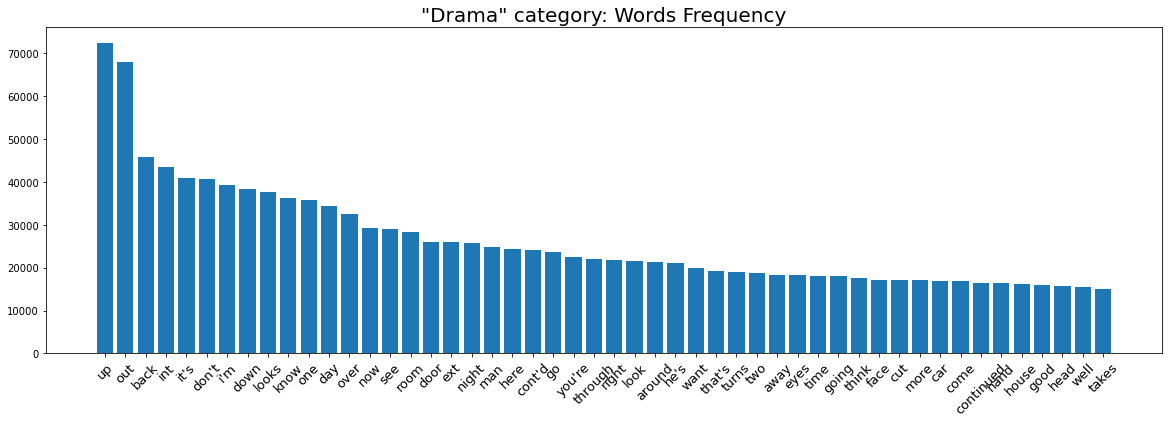

In [15]:
plot_freq('Drama', drama_indexing_terms)

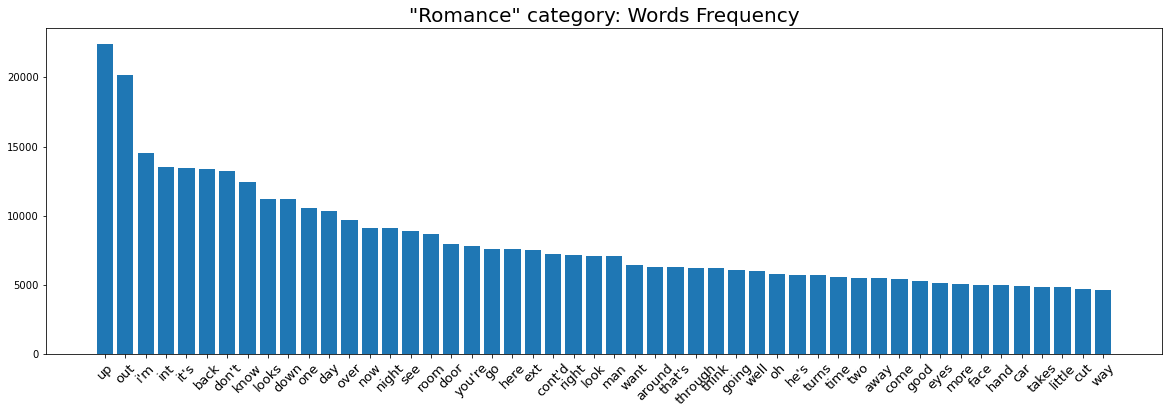

In [16]:
plot_freq('Romance', romance_indexing_terms)

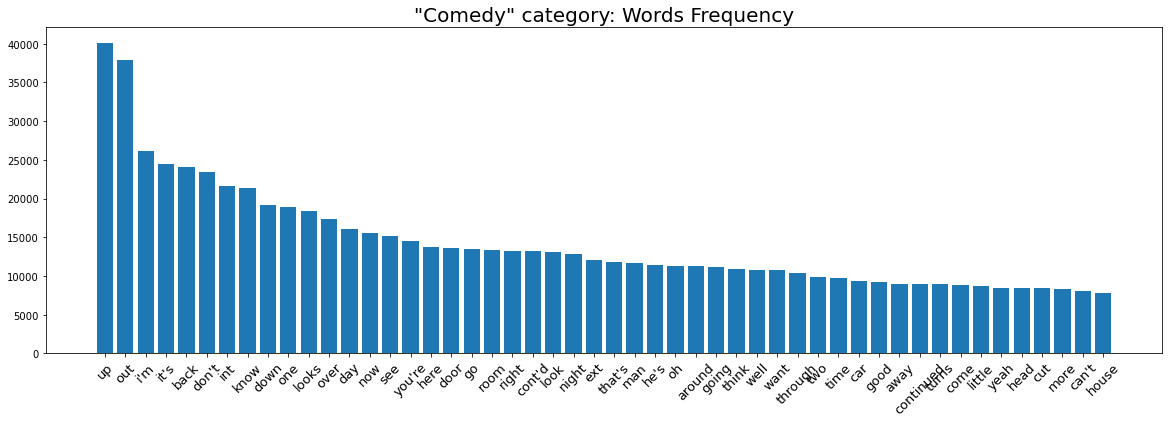

In [17]:
plot_freq('Comedy', comedy_indexing_terms)

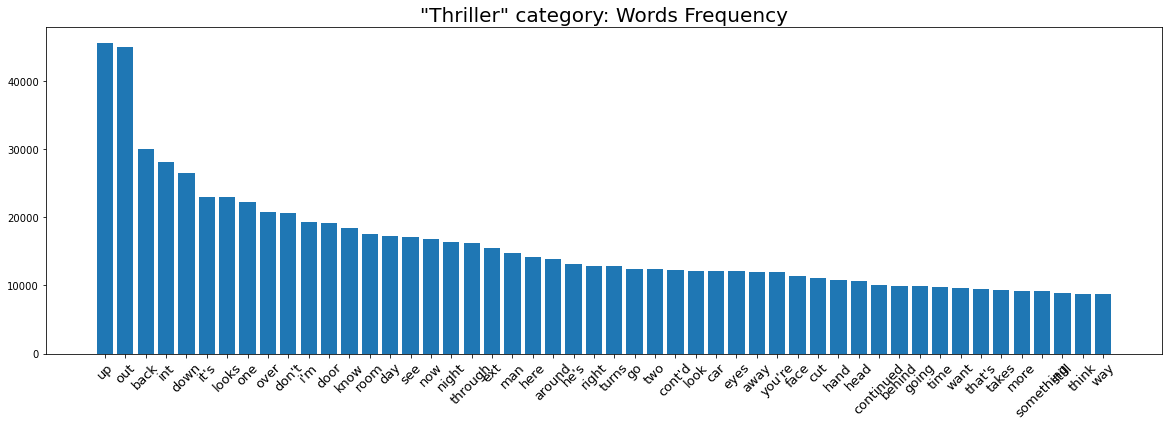

In [18]:
plot_freq('Thriller', thriller_indexing_terms)

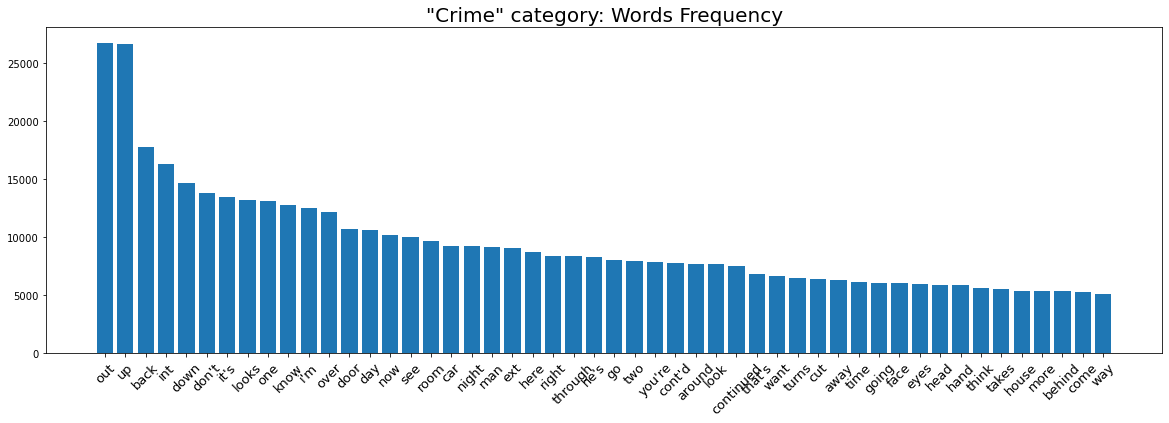

In [19]:
plot_freq('Crime', crime_indexing_terms)

### Result Visualization: Tf-Idf

In [20]:
def plot_tfidf(genre, indexing, tfidf_list):
    plt.figure(figsize=(20,6))
    plt.title(f'"{genre}" category: Tf-Idf', size=20)
    words = [word[0] for word in indexing]
    tfidfs = tfidf_list
    plt.bar(words, tfidfs, color='green')
    plt.xticks(size=15, rotation=45)
    plt.show()

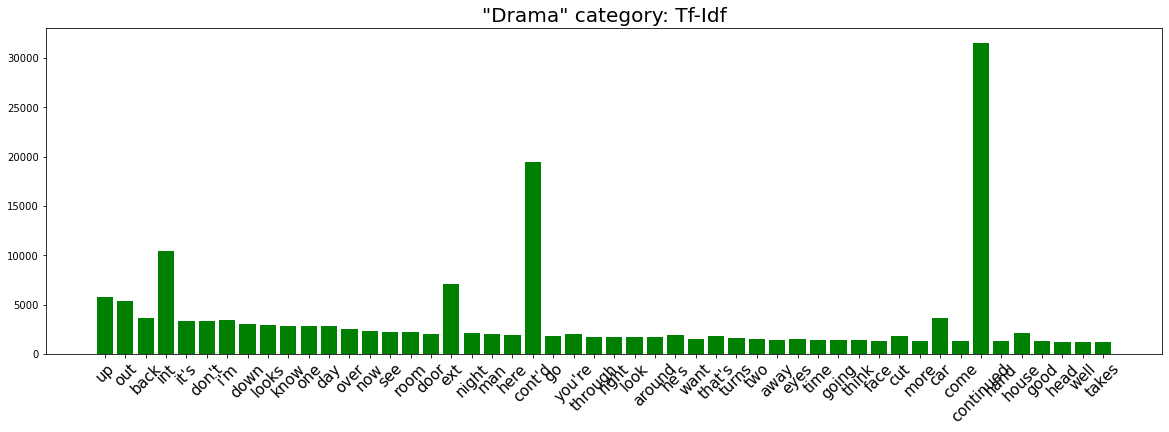

In [21]:
plot_tfidf('Drama', drama_indexing_terms, drama_tfidf_list)

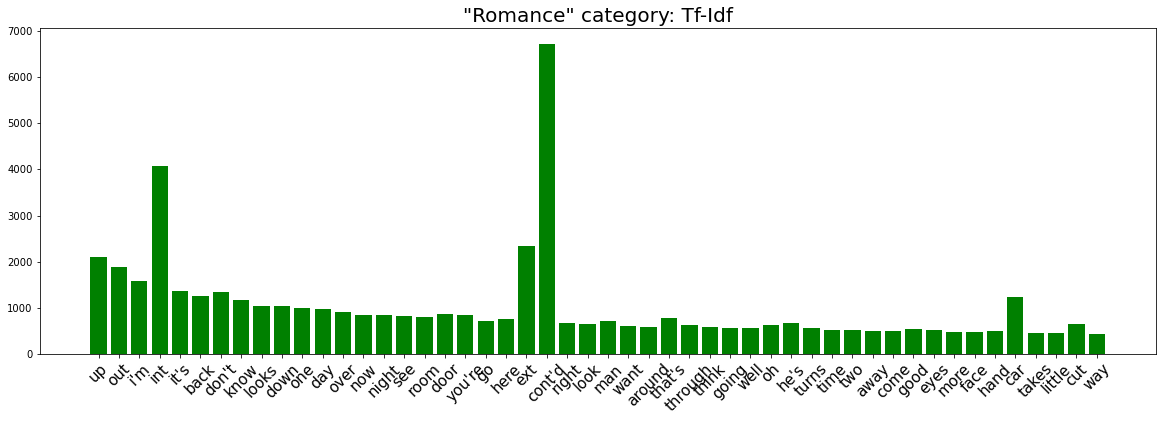

In [22]:
plot_tfidf('Romance', romance_indexing_terms, romance_tfidf_list)

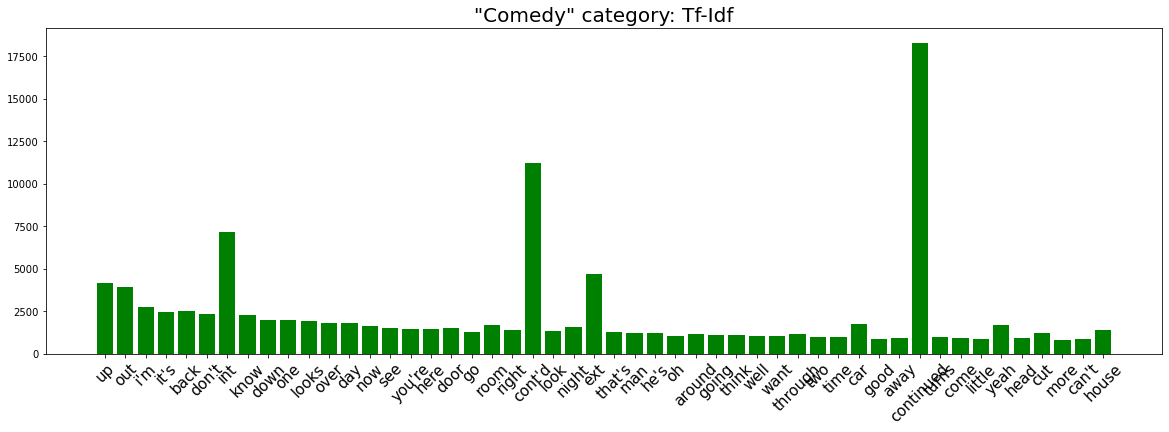

In [23]:
plot_tfidf('Comedy', comedy_indexing_terms, comedy_tfidf_list)

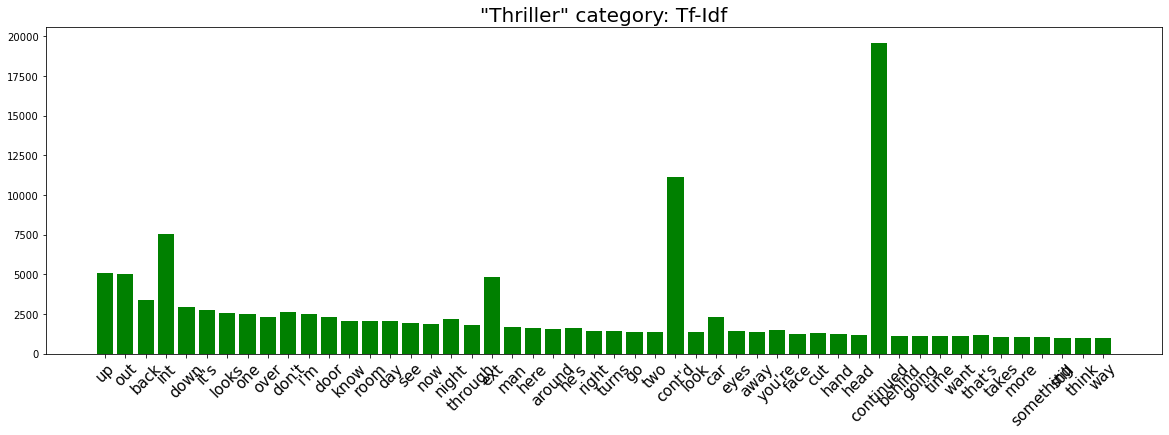

In [24]:
plot_tfidf('Thriller', thriller_indexing_terms, thriller_tfidf_list)

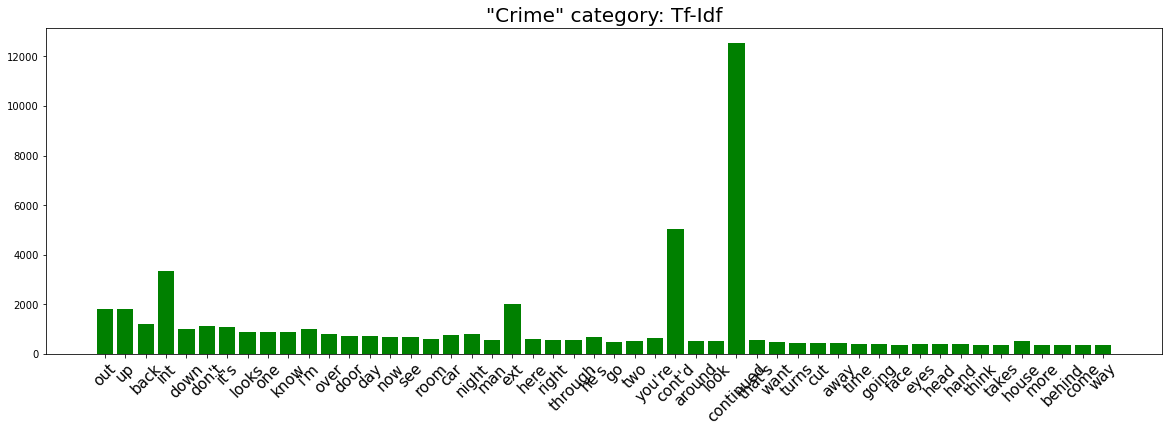

In [25]:
plot_tfidf('Crime', crime_indexing_terms, crime_tfidf_list)